# Chapter 02 Example 022

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = '../../Data/Roses01.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

rosesdf= pd.read_csv(fileFullName,header=0)
print(rosesdf.shape)
print(rosesdf.columns)

roses = np.array(rosesdf)
roses_data = np.array(rosesdf[['F01', 'F02', 'F03', 'F04']].copy(deep=True))
roses_target = np.array(rosesdf['T'].copy(deep=True))

X = roses_data[:, :2]
y = roses_target
print(X.shape)
print(y.shape)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Roses01.csv
(150, 6)
Index(['F01', 'F02', 'F03', 'F04', 'T', 'T2'], dtype='object')
(150, 2)
(150,)


Shrinkage:   1.000 Mean:   0.807


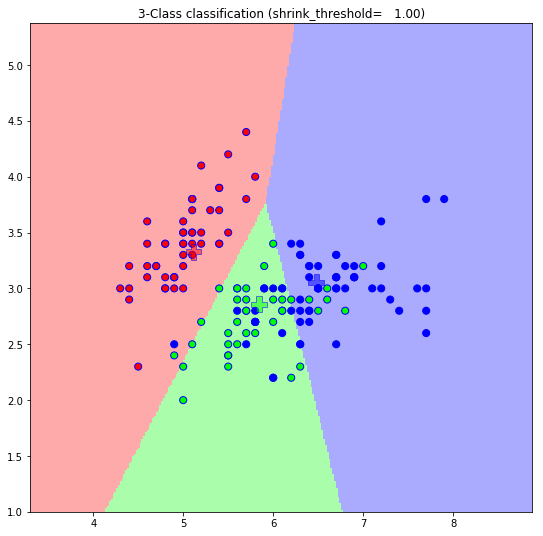

Shrinkage:   3.000 Mean:   0.760


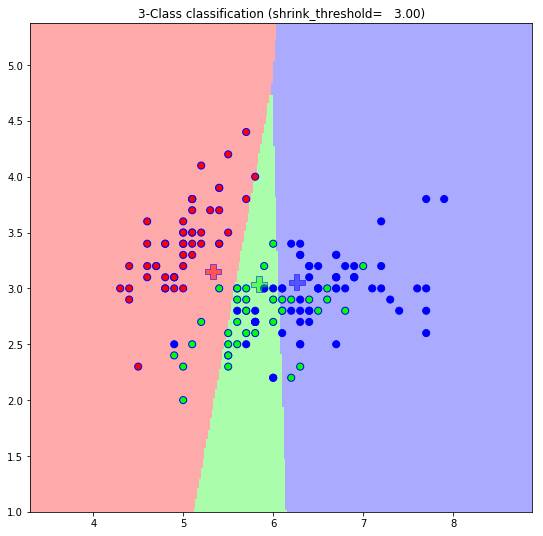

Shrinkage:   5.000 Mean:   0.667


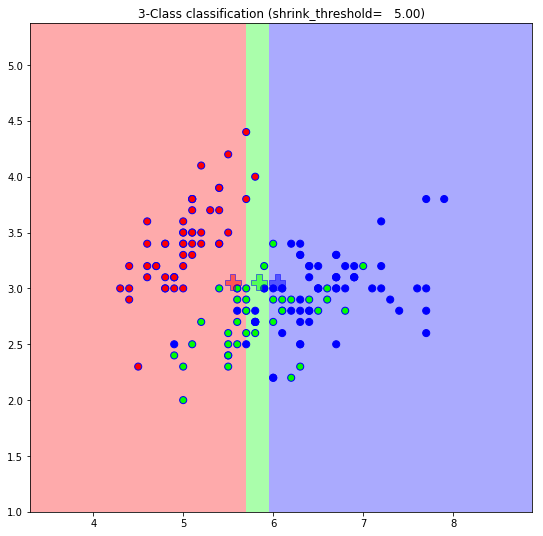

Shrinkage:   7.000 Mean:   0.507


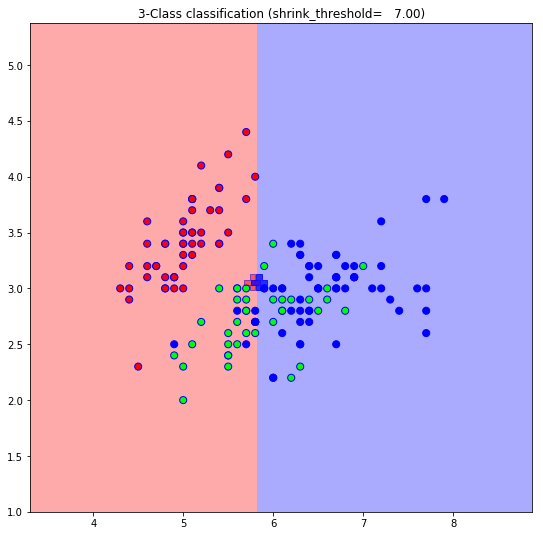

Shrinkage:   9.000 Mean:   0.333


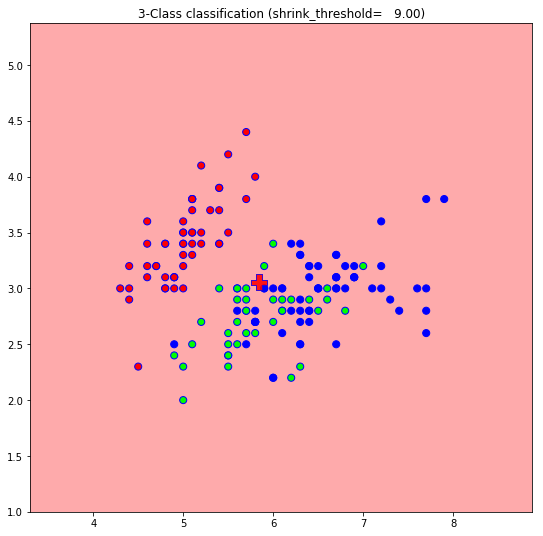

In [3]:
h = .02  # step size in the mesh
n_neighbors = 3

# Create color maps
cmap_light = ListedColormap(['#FEAAAB', '#AAFEAB', '#AAAAFE'])
cmap_bold = ListedColormap(['#FE0000', '#00FE00', '#0000FE'])

for shrinkage in [1, 3, 5, 7, 9]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage, metric='euclidean')
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print('Shrinkage: %7.3f Mean: %7.3f' % (shrinkage, np.mean(y == y_pred)))
    
    CX=clf.centroids_
    Cy=clf.predict(CX)
    
    # Plot the decision boundary. Will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig=plt.figure(figsize=(9, 9))
    ax = fig.subplots(1, 1)
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    X0, X1 = X[:, 0], X[:, 1]
    ax.scatter(X0, X1, c=y, cmap=cmap_bold, edgecolor='b', s=50, marker='o', alpha=1.0)
    
    C0, C1 = CX[:, 0], CX[:, 1]
    ax.scatter(C0, C1, c=Cy, cmap=cmap_bold, edgecolor='b', s=250, marker='P', alpha=0.5)
    
    plt.title('3-Class classification (shrink_threshold=%7.2f)' % (shrinkage))
    plt.axis('tight')

    plt.show()
    
    imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
    #print(imagepath)
    if not os.path.exists(imagepath):
        os.makedirs(imagepath)
    graphName = 'Chapter-04-Example-022-01-%02d.jpg' % (shrinkage)
    imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',graphName])
    fig.savefig(imagename, bbox_inches='tight')
